# Generate noisy experimental observations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def compute_stress(strains, E: float = 180, sigma_y: float = 0.1, H: float = 1, n: float = 0.4) -> list:
    """
    Compute stress for a Linear Elastic-Nonlinear Hardening material

    Parameters:
    - strains (array-like)
    - E (float): Young's modulus
    - sigma_y (float): Yield stress
    - H (float): Plastic hardening modulus
    - n (float): Hardening exponent

    Returns:
    - stress (list)
    """
    stress = []
    strain_y = sigma_y / E
    for strain in strains:
        if strain <= strain_y:
            stress.append(E * strain)
        else:
            stress.append(sigma_y + H * (strain - strain_y)**n)
    return stress

### 'True' model parameters

In [3]:
E =
stress_y =
H =
n = 

### Compute the 'true' stress-strain response

In [4]:
strain = np.linspace(0, 0.05, 1000)
stress = compute_stress(strain, E, stress_y, H, n)

### Generate synthetic experimental data with an adjustable degree of noise

In [13]:
sigma =   # standard deviation of the noise
n_observations = 20
strain_observed = np.random.choice(strain, n_observations)
stress_observed = compute_stress(strain_observed, E, stress_y, H, n) + np.random.normal(
    scale=sigma, size=strain_observed.shape[0]
)

### Visualise the 'true' model and the noisy experimental observations

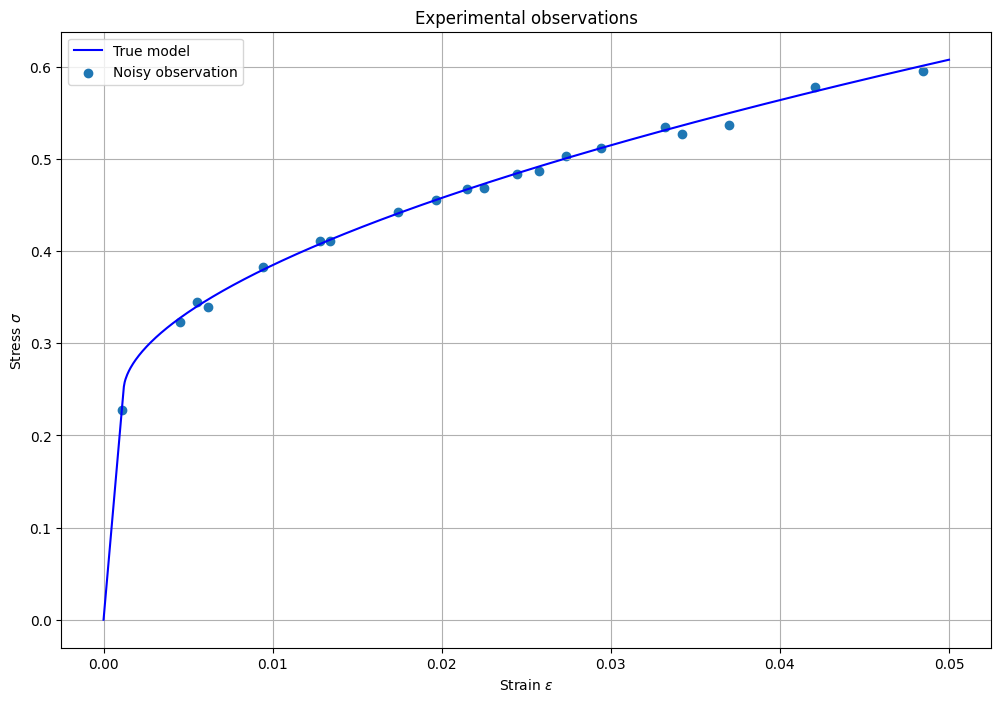

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(strain, stress, label='True model', color='blue')
plt.scatter(strain_observed, stress_observed, label="Noisy observation")
plt.title("Experimental observations")
plt.xlabel("Strain $\epsilon$")
plt.ylabel("Stress $\sigma$")
plt.legend()
plt.grid()

### Save the experimental observations to a `csv` file

In [15]:
data = pd.DataFrame({
    'strain': strain_observed,
    'stress': stress_observed
}).round(5)

data.to_csv('experimental-observations.csv', index=False)